Value-based Reinforcement learning Chapter 2, Tensorflow 2 Reinforcement learning Codebook

In [1]:
import numpy as np 
from envs.gridworldv2 import GridworldV2Env
from value_function_utils import visualize_grid_state_values

In [2]:
env = GridworldV2Env(step_cost=-0.1, max_ep_length=30)

In [3]:
print(env.distinct_states)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']


temporal difference

In [4]:
state = env.reset()

In [5]:
print(state)

8


In [6]:
state_values = np.zeros((len(env.distinct_states), 1))
state_values[env.goal_state] = 1
state_values[env.bomb_state] = -1

In [7]:
gamma = 0.99
alpha = 0.01
v = state_values
max_episodes = 1000

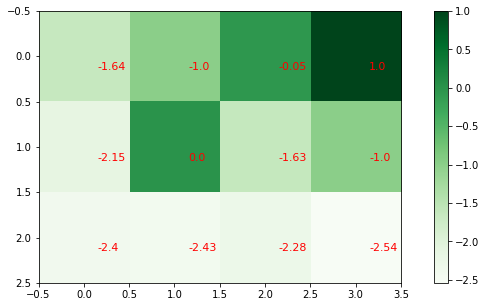

In [8]:
for episode in range(max_episodes):
    state = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()  # random policy
        next_state, reward, done = env.step(action)

        # state-value function updates using TD(0)
        v[state] += alpha * (reward + gamma * v[next_state] - v[state])
        state = next_state
visualize_grid_state_values(state_values.reshape((3, 4)))